In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:

file_es_tabular = "./results/es_tb_results_20231123_012701"
file_es_gat = "./results/gnn_es_runs_to_test_2"

file_mx_tabular = "./results/mx_tb_results_20231124_151458"
file_mx_gat = "./results/gnn_mx_runs_to_test"

file_mx_gcn = "./results/gcn_mx_runs_to_test"
file_es_gcn = "./results/gcn_es_runs_to_test"

In [45]:
df_es_tab = pd.read_csv(file_es_tabular, index_col = [0, 1])
df_es_gat = pd.read_csv(file_es_gat)
df_es_gcn = pd.read_csv(file_es_gcn)

In [46]:
df_mx_tab = pd.read_csv(file_mx_tabular, index_col = [0, 1])
df_mx_gat = pd.read_csv(file_mx_gat)
df_mx_gcn = pd.read_csv(file_mx_gcn)

In [81]:
def concat_df_tab_gnn(df_tab, df_gnn, gnn="GAT"):
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    m_index = pd.MultiIndex.from_product([[gnn], metrics])
    df_gnn.index = m_index
    df_gnn.drop(columns=["Unnamed: 0"], inplace=True)
    return pd.concat([df_tab, df_gnn], axis=0)

def boxplot_sorted(df, score, rot=90, figsize=(8,5), fontsize=20):
    df2 = df.xs(score, level=1, drop_level=True).T
    meds = df2.median().sort_values(ascending=False)
    axes = df2[meds.index].boxplot(
                    figsize=figsize, rot=rot, fontsize=fontsize,
                    boxprops=dict(linewidth=4, color='cornflowerblue'),
                    whiskerprops=dict(linewidth=4, color='cornflowerblue'),
                    medianprops=dict(linewidth=4, color='firebrick'),
                    capprops=dict(linewidth=4, color='cornflowerblue'),
                    flierprops=dict(marker='o', markerfacecolor='dimgray',
                                    markersize=6, markeredgecolor='black'),
                    return_type="axes")

    axes.set_title(f'Boxplots of {score} metric',
                   fontsize=fontsize)
    
    axes.margins(y=1)
    plt.show()
    
def print_median_metrics(df):
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    for metric in metrics:
        df_median = df.xs(metric, level=1, drop_level=True).T
        
        df_median_by_col = df_median.median().sort_values(ascending=False)
        
        df_median = df_median[df_median_by_col.index].describe()
        print(f"Resultado da métrica {metric}")
        print(df_median)

def plot_boxplot(df_results):
    # Plota bloxpot das métricas
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    for metrica in metrics:
        boxplot_sorted(df_results, metrica, rot=90, figsize=(16,10), fontsize=20)
    



### Resultado final ES

In [47]:
df_es_concat = concat_df_tab_gnn(df_es_tab, df_es_gat)

#### Print das métricas

In [48]:
df_es_concat = concat_df_tab_gnn(df_es_concat, df_es_gcn, gnn="GCN")
print_median_metrics(df_es_concat)

Resultado da métrica accuracy
        CatBoost         LR    XGBoost         RF        GAT        GCN
count  30.000000  30.000000  30.000000  30.000000  10.000000  10.000000
mean    0.911452   0.910474   0.911002   0.908739   0.879279   0.871328
std     0.003406   0.003122   0.003561   0.003643   0.017599   0.005364
min     0.905279   0.903666   0.903519   0.899707   0.866750   0.863281
25%     0.909238   0.908065   0.908651   0.906342   0.870534   0.868047
50%     0.911584   0.910850   0.910850   0.909091   0.874863   0.872500
75%     0.913270   0.912133   0.912903   0.911070   0.878842   0.873867
max     0.920235   0.916716   0.919062   0.915982   0.927134   0.879062
Resultado da métrica precision
              LR   CatBoost         RF    XGBoost        GAT        GCN
count  30.000000  30.000000  30.000000  30.000000  10.000000  10.000000
mean    0.925711   0.921850   0.920507   0.920804   0.866777   0.851647
std     0.004481   0.004956   0.004615   0.004844   0.019807   0.012952
min

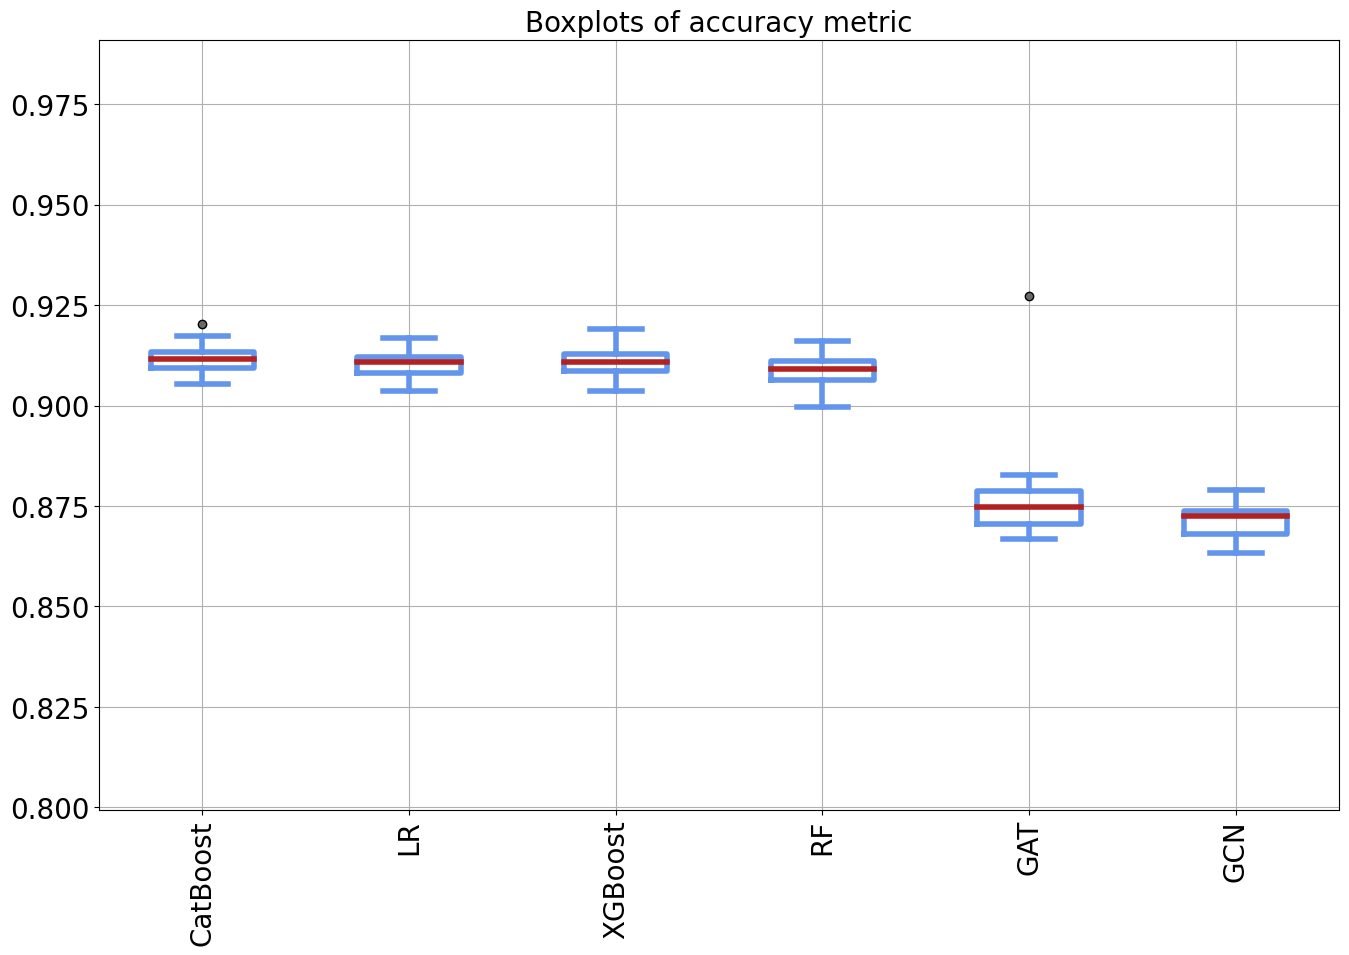

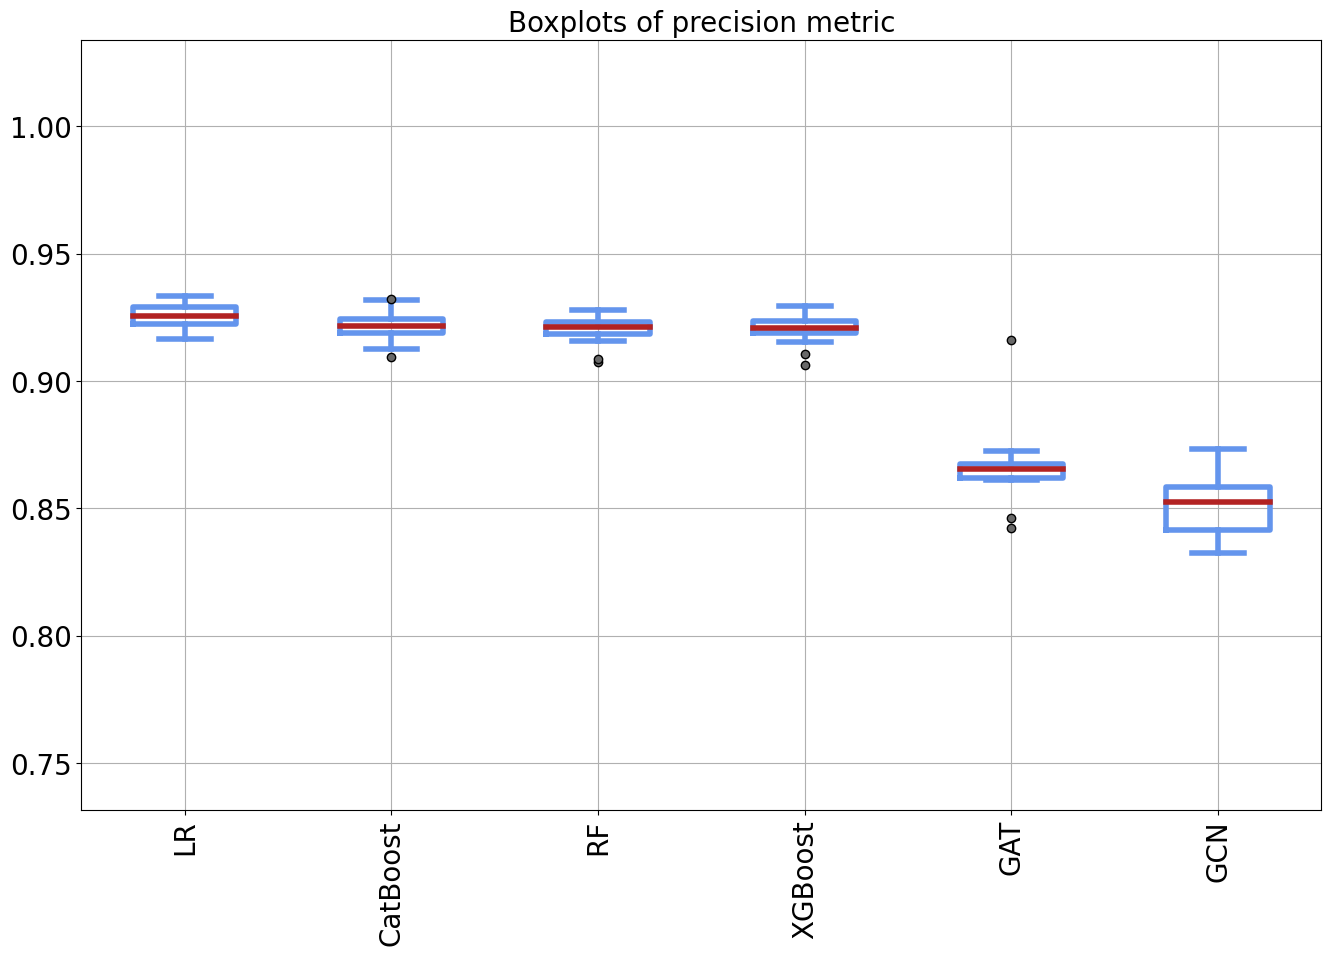

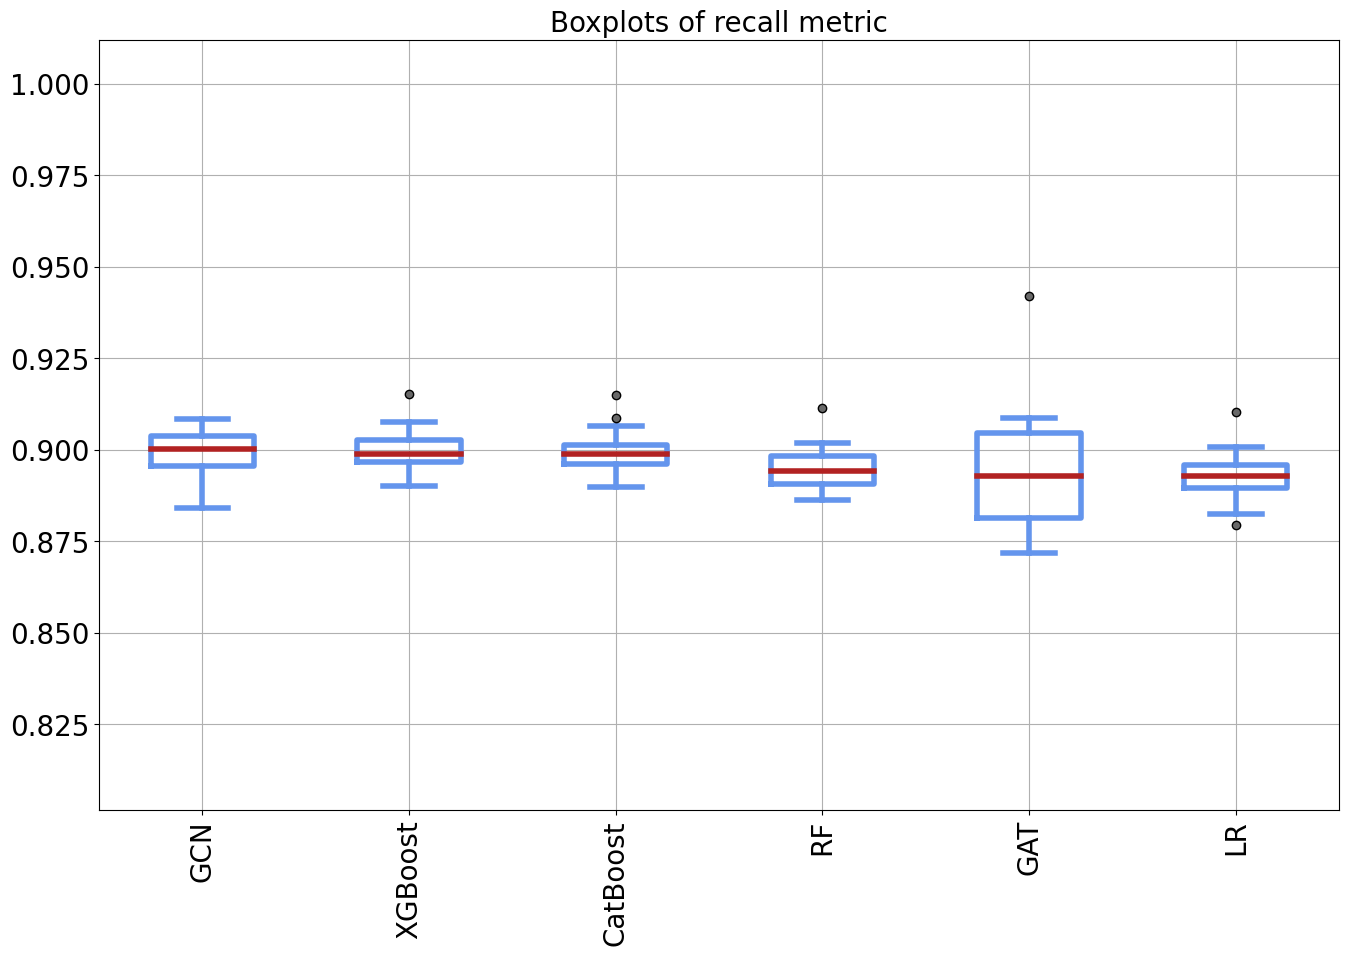

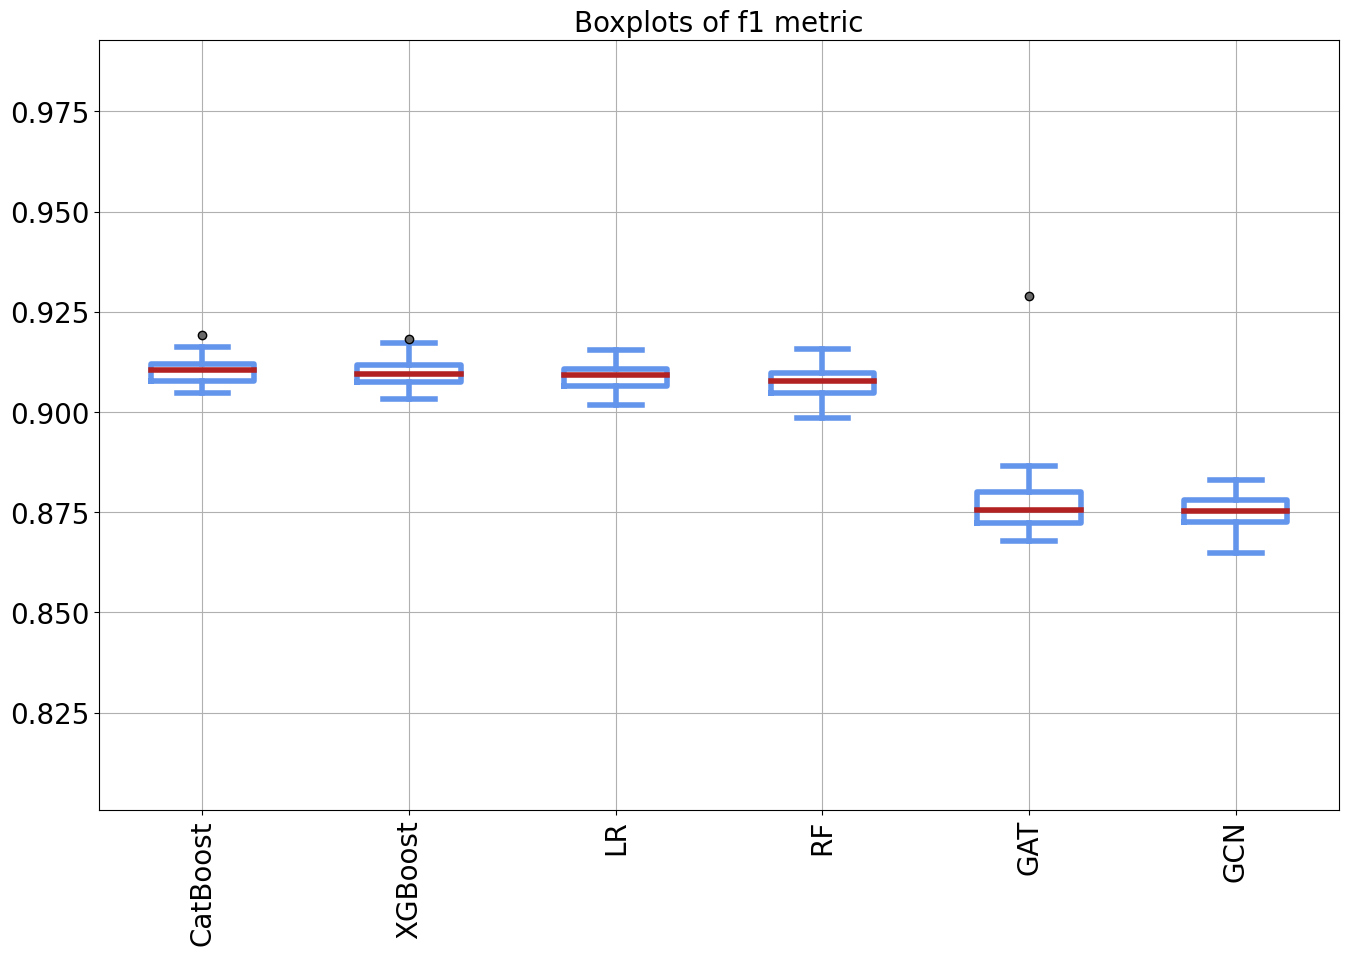

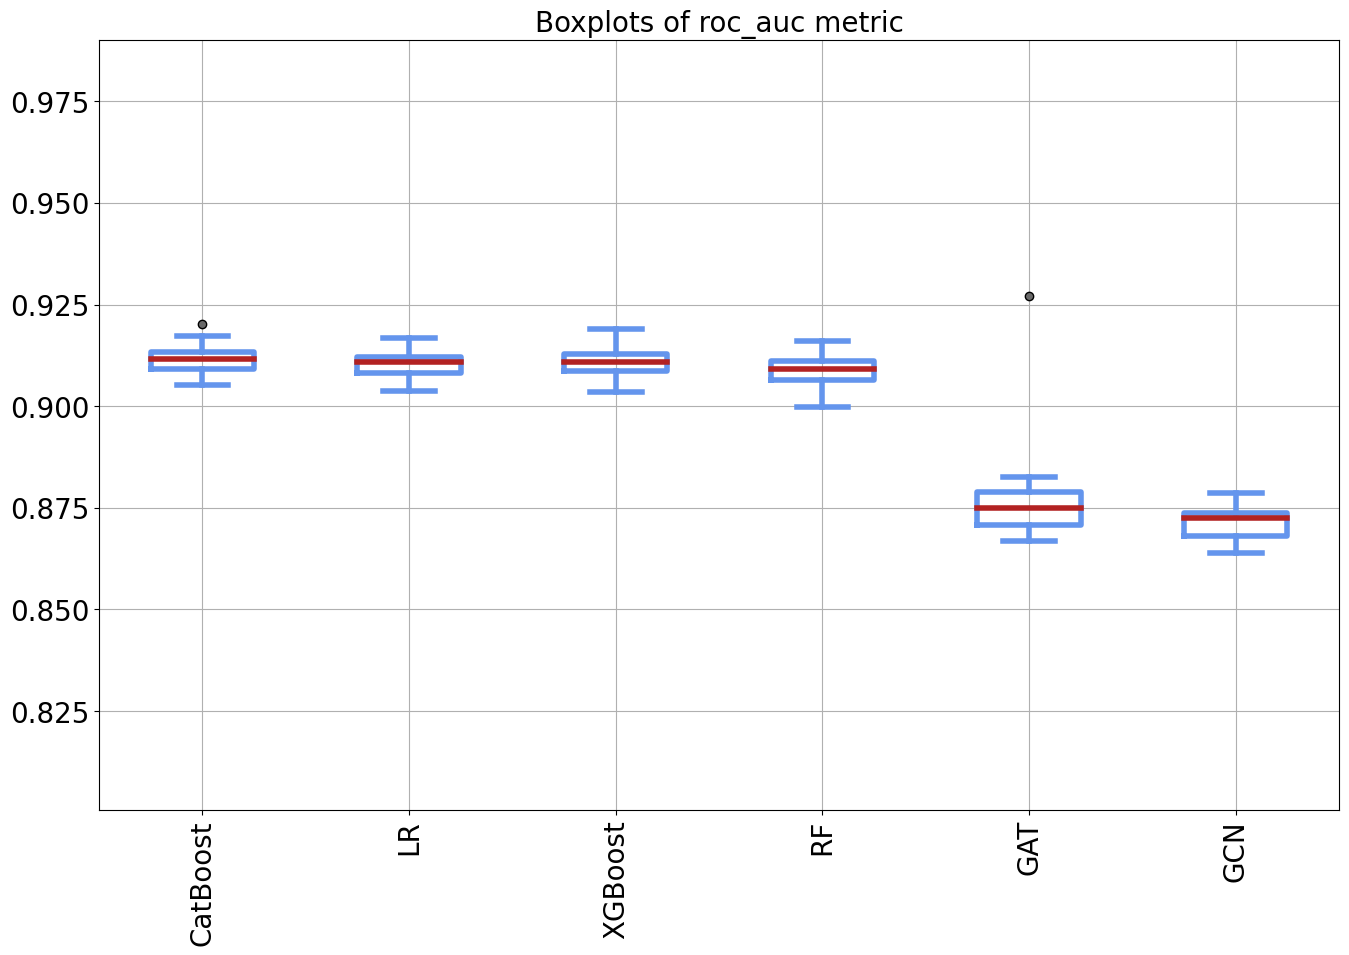

In [82]:
plot_boxplot(df_es_concat)

### Resultado final MX

In [9]:
df_mx_concat = concat_df_tab_gnn(df_mx_tab, df_mx_gat)

#### Print das métricas

In [10]:
df_mx_concat = concat_df_tab_gnn(df_mx_concat, df_mx_gcn, gnn="GCN")
print_median_metrics(df_mx_concat)

Resultado da métrica accuracy
        CatBoost    XGBoost         RF         LR        GCN        GAT
count  30.000000  30.000000  30.000000  30.000000  10.000000  10.000000
mean    0.919183   0.918958   0.912705   0.909962   0.887628   0.884987
std     0.001235   0.001369   0.001254   0.001439   0.004355   0.006574
min     0.917019   0.916792   0.910312   0.906857   0.882015   0.870865
25%     0.918321   0.917963   0.912063   0.908948   0.884447   0.881958
50%     0.919258   0.919099   0.912825   0.910017   0.887675   0.886132
75%     0.919975   0.919730   0.913467   0.910898   0.890904   0.888955
max     0.921725   0.921862   0.916019   0.912995   0.895089   0.894243
Resultado da métrica precision
              LR    XGBoost   CatBoost         RF        GAT        GCN
count  30.000000  30.000000  30.000000  30.000000  10.000000  10.000000
mean    0.902659   0.895815   0.894709   0.883790   0.852099   0.848807
std     0.001839   0.001718   0.001777   0.001663   0.009658   0.007560
min

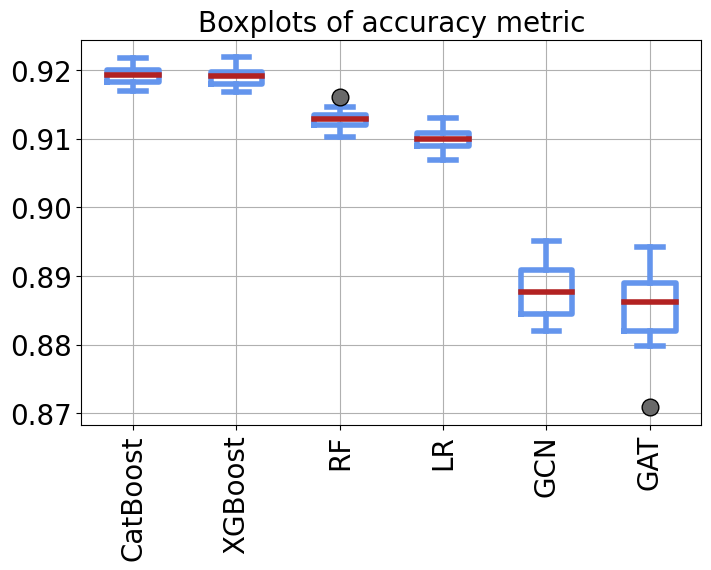

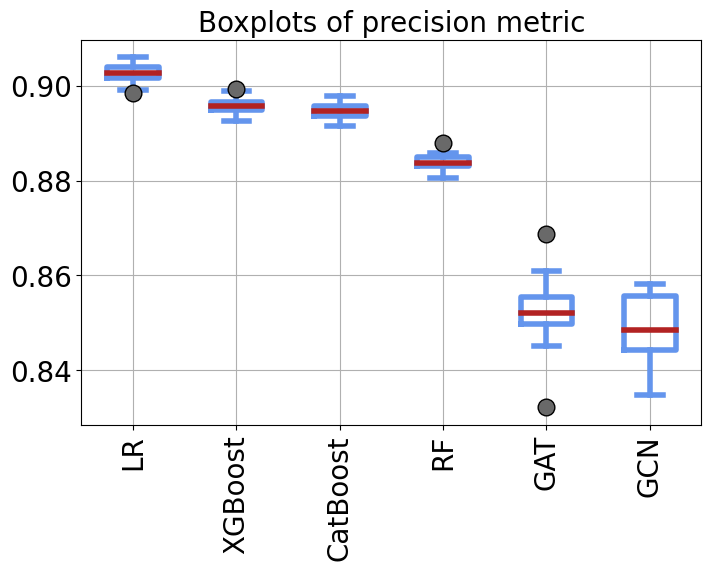

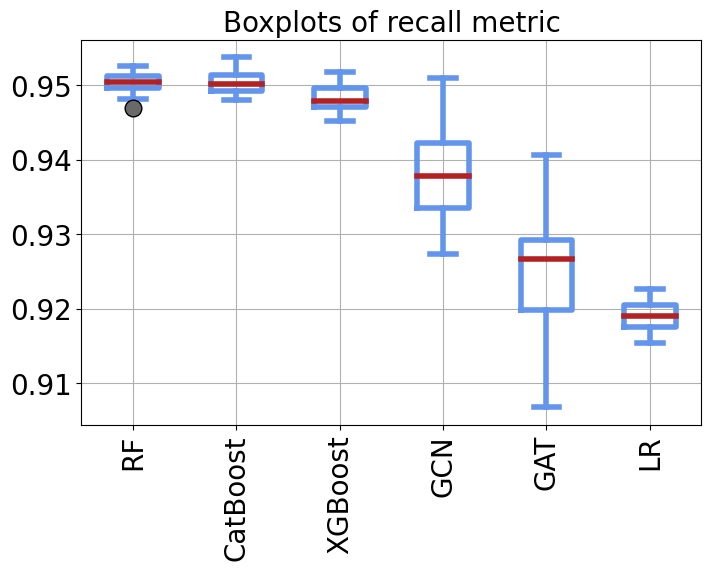

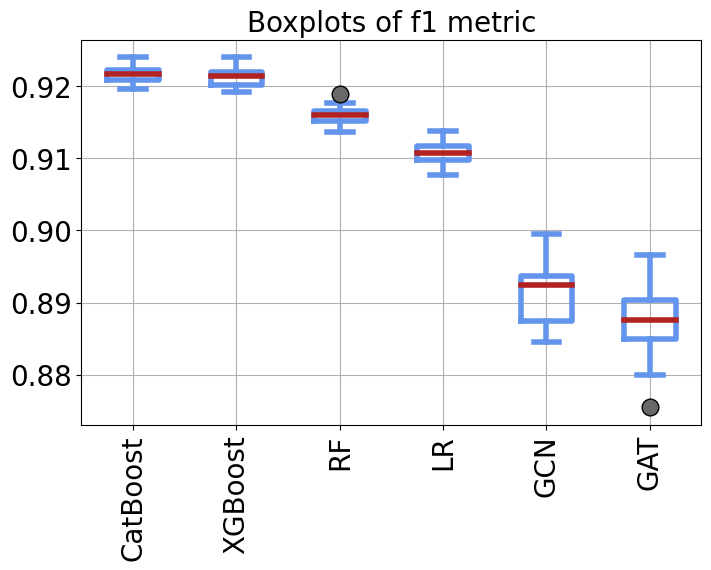

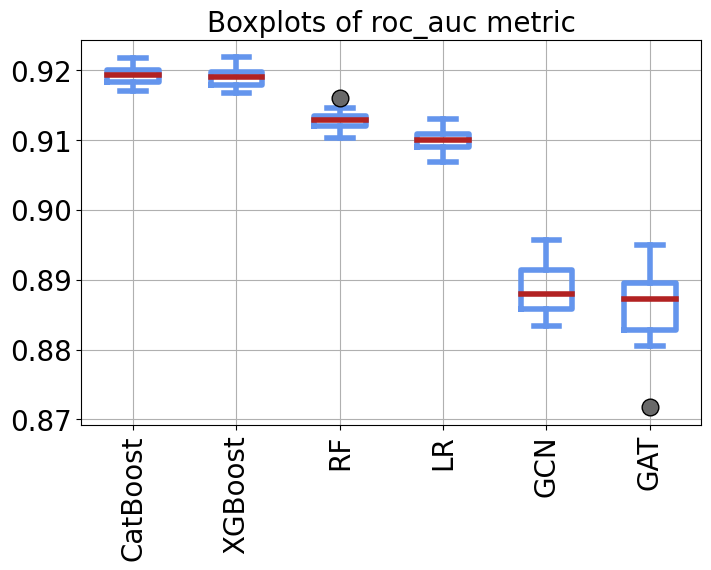

In [11]:
plot_boxplot(df_mx_concat)